The goal of this notebook is to test the performance of Kernel Density Estimation (KDE) of the probability distribution function (PDF) for different number of dimensions. 

The notebook uses scipy's implementation of KDE. It uses two Nested Sampling chains generated using PolyChord, from Gaussian likelihoods with flat priors. This means that we know what the true values of the log-likelihood is.

Written by Pablo Lemos (UCL)

pablo.lemos.18@ucl.ac.uk

Feb 2020

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from kde_method import *
from stats import *
from gaussian_approximation import get_pte_from_gaussian
from scipy.stats import norm, multivariate_normal

#  Two-dimensional case

First, we test the performance of the KDE on a two dimensional case. The PolyChord chains have been generated from a Gaussian likelihood centered at zero and with identity covariance. 

We start by loading the chains

In [2]:
path_to_chains = path_to_chains = 'chains/gaussian_2d'
weights_2d, loglike_2d, X_2d = load_chains(path_to_chains)

We now use KDE to estimate the log likelihood for each sample

In [3]:
kde = fit_kde(X_2d, weights_2d)
loglike_kde = get_kde_loglike(X_2d, kde)

Because we know the true log likelihood, we can compare the estimate and the truth

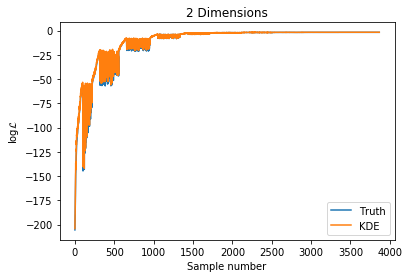

In [4]:
plt.figure()
plt.plot(loglike_2d, label='Truth')
plt.plot(loglike_kde, label='KDE')
plt.xlabel('Sample number')
plt.ylabel(r'$\log \mathcal{L}$')
plt.title('2 Dimensions')
plt.legend()
plt.savefig('./FIGS/logl_2d.pdf')

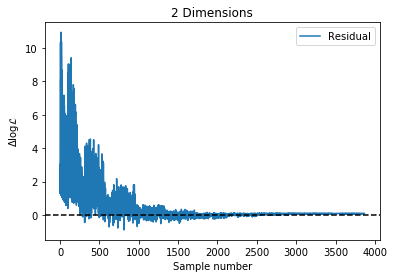

In [5]:
plt.figure()
plt.plot(loglike_kde-loglike_2d, label='Residual')
plt.axhline(0, color = 'k', ls = '--')
plt.title('2 Dimensions')
plt.xlabel('Sample number')
plt.ylabel(r'$\Delta \log \mathcal{L}$')
plt.legend()
plt.savefig('./FIGS/logl_residuals_2d.pdf')

We see that while the estimates far in the tails are inaccurate, most of the estimates are very good

We can also check if a KDE estimated PTE and number of sigma are accurate. We will test that using a point with x = 1 for every dimension. 

In [6]:
mean = np.zeros(2)
cov = np.identity(2)
x = np.ones(2)

# The true log-likelihood of x
loglike_x = multivariate_normal.logpdf(x, mean=mean, cov=cov)

In [7]:
pte = get_pte_from_samples(x, loglike_x, loglike_2d, weights_2d)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.3339700242963761
Number of sigma = 0.9661482087697499


In fact, in this case, we do not even need to use the PolyChord samples, as we can just generate a large number of samples

In [8]:
# The number of samples used in the PTE estimation
nsamples = int(1e6) 

In [9]:
pte = get_pte_from_gaussian(x, mean, cov, nsamples)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.367733
Number of sigma = 0.9007279200765931


And the results are very similar. Note that the difference is caused by the polychord being low resolution, for speed and to reduce the size of files

We can compare this truth with the PTE obtained using the KDE

In [10]:
loglike_x_kde = get_kde_loglike(x, kde)

print('True log-like: ', loglike_x)
print('KDE log-like: ', loglike_x_kde[0])

True log-like:  -2.8378770664093453
KDE log-like:  -2.8135941365361976


In [11]:
pte = get_pte_from_samples(x, loglike_x_kde, loglike_kde, weights_2d)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.3416058393393351
Number of sigma = 0.9509971170862905


Again, this is a veey good estimate of PTE and number of sigma

# Five dimensional case

We now do the exact the same, with a similar likelihood, but in five dimensions. First we load the chain:

In [12]:
path_to_chains = path_to_chains = 'chains/gaussian_5D'
weights_5d, loglike_5d, X_5d = load_chains(path_to_chains)

We fit and obtain a KDE log-likelihood

In [13]:
kde = fit_kde(X_5d, weights_5d)
loglike_kde = get_kde_loglike(X_5d, kde)

In [14]:
loglike_kde = get_kde_loglike(X_5d, kde)

We produce some plots to compare the truth with the KDE likelihood estimate

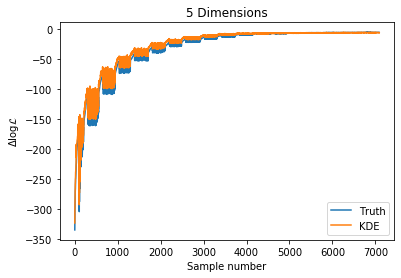

In [15]:
plt.figure()
plt.plot(loglike_5d, label='Truth')
plt.plot(loglike_kde, label='KDE')
plt.title('5 Dimensions')
plt.xlabel('Sample number')
plt.ylabel(r'$\Delta \log \mathcal{L}$')
plt.legend()
plt.savefig('./FIGS/logl_5d.pdf')

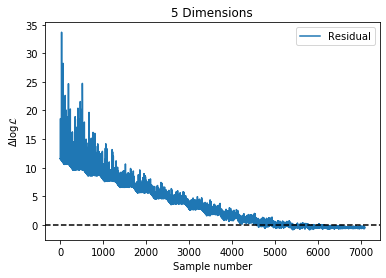

In [16]:
plt.figure()
plt.plot(loglike_kde-loglike_5d, label='Residual')
plt.axhline(0, color = 'k', ls = '--')
plt.title('5 Dimensions')
plt.xlabel('Sample number')
plt.ylabel(r'$\Delta \log \mathcal{L}$')
plt.legend()
plt.savefig('./FIGS/logl_residuals_5d.pdf')

This time there is clearly a problem! The KDE estimate of the likelihood is significantly higher than the truth, and this trend seems to appear for more than half of the chain. This will lead to an inaccurate estimate of the PTE. Let's test it

In [17]:
mean = np.zeros(5)
cov = np.identity(5)
x = np.ones(5)

# The true log-likelihood of x
loglike_x = multivariate_normal.logpdf(x, mean=mean, cov=cov)

In [18]:
pte = get_pte_from_samples(x, loglike_x, loglike_5d, weights_5d)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.4320446972691723
Number of sigma = 0.785697552800761


We compare the estimate from PolyChord samples to an estimate from generating a much larger number of samples

In [19]:
# The number of samples used in the PTE estimation
nsamples = int(1e6) 

In [20]:
pte = get_pte_from_gaussian(x, mean, cov, nsamples)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.415412
Number of sigma = 0.8144067028756895


Again, despite the low resolution settings of the PolyChord chains, the results are similar

Now we estimate PTE and number of sigma from the KDE

In [21]:
loglike_x_kde = get_kde_loglike(x, kde)

print('True log-like: ', loglike_x)
print('KDE log-like: ', loglike_x_kde[0])

True log-like:  -7.094692666023363
KDE log-like:  -6.6254553454511935


This is already worrying, the KDE estimate of the log-likelihoods is far from the true value

In [22]:
pte = get_pte_from_samples(x, loglike_x_kde, loglike_kde, weights_5d)
nsigma = get_nsigma(pte)

print('PTE =', pte)
print('Number of sigma =', nsigma)

PTE = 0.3162344133794155
Number of sigma = 1.0022260824254132


The number of sigma is completely off! This means that we cannot trust the 5 dimensional KDE, at least not with these settings

# Possible solutions

I have some ideas about things to do. I would like to know what people think.

- Using a different kernel or bandwidth. I have no experience working with KDE. If there are better settings to use in a case like this, let me know. 
- Using a different KDE implementation, such as fastKDE. Again, if you have experience in this that would be very helpful
- Using some parametric reconstruction of the PDF, instead of a KDE. Here the problem is that we will probably run into Gaussian or similar approximations, which we are trying to avoid.